# L3b: Praktyczny Machine Learning w Pythonie
<br>
<img src="figures/L1/dilbert-2213.gif">

## Rozpoznawanie cyfr

Nasz model będzie składał się z 2 kroków:
1. Zmniejszenie ilości wymiarów
2. Klasyfikacja modelem liniowym

Najpierw jednak musimy zapoznać się ze zbiorem danych.

In [ ]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [17]:
class DataSet:
    pass

In [19]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = DataSet()
#     mnist = {
#         "data": mnist_raw["data"].T,
#         "target": mnist_raw["label"][0],
#         "COL_NAMES": ["label", "data"],
#         "DESCR": "mldata.org dataset: mnist-original",
#     }
    mnist.data = mnist_raw["data"].T
    mnist.target = mnist_raw["label"][0]
    mnist.COL_NAMES = ["label", "data"]
    mnist.DECAR = "mldata.org dataset: mnist-original"
    print("Success!")
    


Could not download MNIST data from mldata.org, trying alternative...
Success!


### MNIST

<img src="figures/L1/mnist_originals.png">

MNIST to baza danych odręcznie napisanych cyfr około 20 lat temu. Ludzie są w stanie rozpoznać ok. 99,5% cyfr z tego zbioru poprawnie.
Zobaczymy ile nam się uda!

In [20]:
img = mnist.data[0]
print "Pierwsz obrazek z ", mnist.data.shape[0], ":", img # Pixele

Pierwsz obrazek z  70000 : [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 252 252 252 253

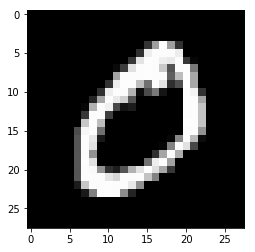

In [21]:
# Możemy sobie narysować wcześniej wypisaną cyfrę
import matplotlib.pylab as plt
%matplotlib inline
plt.imshow(img.reshape(28,28), cmap="gray")

In [22]:
import sklearn
from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import numpy as np

### Krok 1: wczytanie i podzielenie danych

Skalowanie jest bardzo ważne. Dzięki temu mamy średnią danej cechy 0 i wariancję 1 (mówiąc po ludzku, dane będą bardziej  przypominały kulke w przestrzeni wejściowej)

<img src="figures/L1/prepro2.jpeg" width=600>

In [23]:
#Wczytujemy dane i skalujemy
X, Y = mnist.data.astype("float64"), mnist.target 
X = preprocessing.scale(X)

Tak jak wspomniałem algorytm trenujemy na innych danych niż testujemy. **To bardzo ważne**. Do każdych danych da się dopasować taki model, który idealnie na nich odpowiada (np. poprzez zapamiętanie wszystkich przykładów). Jeśli tak zrobimy, to mówimy że nasz model **zoverfitował**.

<img src="figures/L1/underfitting-overfitting.png">

In [24]:
#Dzielimy na dane trenujące i testujące
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

### Krok 2: dopasujmy pare modeli

In [25]:
# Na wszystkich przykladach osiaga 92% dokladnosci. 
N = 500 # Podzbiór danych
model = LogisticRegression(C=0.001) # Model z domyślnymi parametrami
model.fit(X_train[0:N], Y_train[0:N])

Y_test_predicted = model.predict(X_test)
print "Dokładność modelu wytrenowanego na ",N, " przykladach to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"

Dokładność modelu wytrenowanego na  500  przykladach to:  77.2571428571 %


In [26]:
# Na wszystkich przykladach osiaga 92% dokladnosci. 
N = 500 # Podzbiór danych
model = LogisticRegression(C=1) # Mniej regularyzacji, a taka sama dokladnosc
model.fit(X_train[0:N], Y_train[0:N])

Y_test_predicted = model.predict(X_test)
print "Dokładność modelu wytrenowanego na ",N, " przykladach to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"

Dokładność modelu wytrenowanego na  500  przykladach to:  78.5142857143 %


Przyklad zaklasyfikowany jako  [ 7.]


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


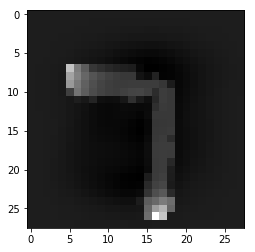

In [27]:
print "Przyklad zaklasyfikowany jako ", model.predict(X_test[5])
plt.imshow(X_test[5].reshape(28,28), cmap="gray")

### Cwiczenie 1 (1 pkt)

Prosze narysowac wykres (plt.plot) dokladnosci w zaleznosci od wartosci C na zbiorze treningowym i testowym (dla tych N=500 przykladow)

In [66]:
N = 500 # Podzbiór danych
C_s = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]
results = []
models = []

for C_in in C_s:
    model = LogisticRegression(C=C_in)
    models.append(model)
    model.fit(X_train[0:N], Y_train[0:N])
    Y_test_predicted = model.predict(X_test)
    results.append(100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted))

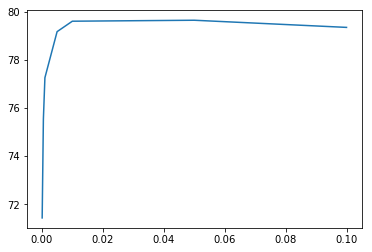

In [67]:
plt.plot(C_s, results)

### Cwiczenie 2 (2 pkt)

(Punkt za narysowanie oraz punkt za poprawne wytłumaczenie)

Proszę narysować jak wyglądaja nauczone wagi modelu dla różnych wartości parametru C (należy użyc plt.imshow). Z czego wynikają różnice w narysowanych obrazkach? 

Uwaga: wagi modelu regresji logistycznej są wymiaru (10, 28*28). Aby narysować wagi odpowiadające klasie "3" należy pobrać w[4]. Aby narysować to z użyciem imshow należy zrobić w[4].reshape(28, 28)

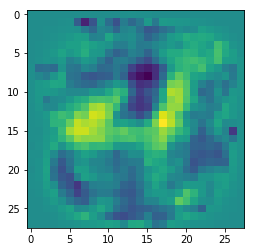

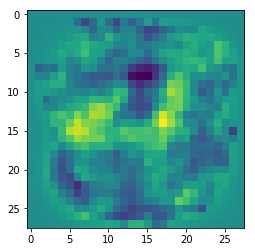

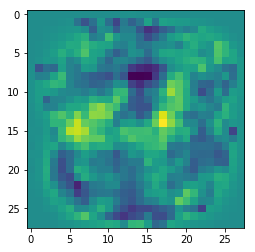

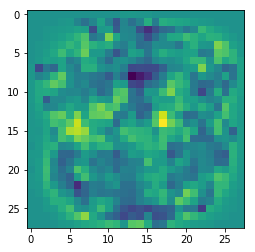

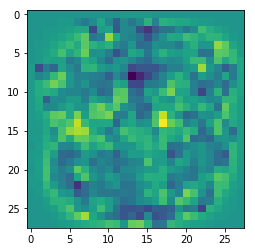

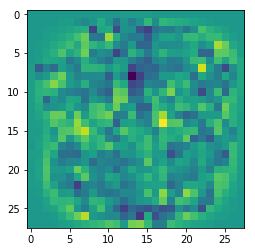

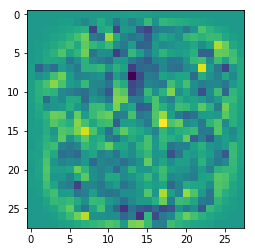

In [73]:
for model, i in zip(models, range(0, len(models))):
    plt.imshow(model.coef_[4].reshape(28, 28))
    plt.show()

Ponieważ w 'późniejszych' obrazkach jest zastosowana większa regularyzacja, mniejsze znaczenie dla wag mają przykłady ze zbioru trenującego, a większe zaczyna mieć zmniejszenie złożoności modelu, przez co trudniej jest wagą rosnąć, bo są 'ucinane' przez regularyzację.

### Krok 3: Tworzymy caly model zmniejszając wielkość przykładów

W scikit-learn możemy połączyć pare modeli w **pipeline**, który sam implementuje interfejs **Estimator**.

In [74]:
pca = decomposition.PCA(n_components=20)
pca.fit(X_train)
X_train_transf = pca.transform(X_train)

In [75]:
logistic = linear_model.LogisticRegression(C=0.1)
logistic.fit(X_train_transf, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [77]:
# Zobaczmy na dokładność modelu
Y_test_predicted = pipe.predict(X_test)
print "Dokładność modelu wytrenowanego to: ",100*sklearn.metrics.accuracy_score(Y_test, Y_test_predicted), "%"

Dokładność modelu wytrenowanego to:  84.9428571429 %


# Deep Learning

Jak widać, na rozważanych zbiorach, można osiągnąć wysoką dokładność (>85%) używając prostych modeli. Niestety na bardziej skomplikowanych danych (np. CIFAR-100, https://www.cs.toronto.edu/~kriz/cifar.html) nie jest już tak prosto.

Tradycyjne architektury, które były popularne do niedawna, używały ręcznej ekstrakcji "lepszych" cech:

<img src="figures/L1/standard.jpg">

Deep Learning jest poddziedziną machine learningu, gdzie rozważamy architektury, które samoistnie uczą się cech na tyle dobrych, że dokładnie takie same modele jak Państwu pokazywaliśmy działają z zadowalającą precyzją

<img src="figures/L1/features.png">